# imports 

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import acquire, prepare 

from env import user, password, host
from wordcloud import WordCloud

Exercises

Do your work for this exercise in a file named explore.

Spam Data



Load the spam data set.


In [16]:
# acquire data from spam_db

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Create and explore bigrams for the spam data.

In [17]:
# from curriculum 
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [18]:
#this will join all the entire text column for entries labled ham
# runs them through clean function
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df.text))

In [19]:
ham_bigrams = pd.Series(list(nltk.bigrams(ham_words))).value_counts()
spam_bigrams = pd.Series(list(nltk.bigrams(spam_words))).value_counts()
all_bigrams = pd.Series(list(nltk.bigrams(all_words))).value_counts()

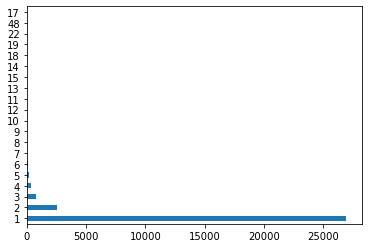

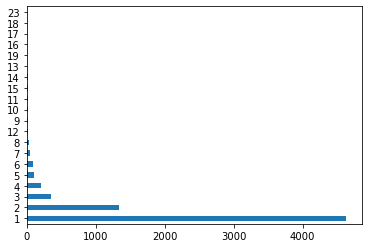

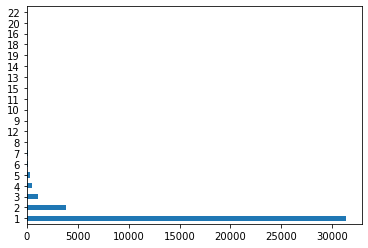

In [20]:
for bigrams in [ham_bigrams, spam_bigrams, all_bigrams]:
    
    bigrams.value_counts().head(20).plot.barh()
    plt.show()

 Visualize them with a word cloud. How do they compare with the ham bigrams?


In [ ]:
' '.join(ham_bigrams.apply('-'.join))

'go-jurong jurong-point point-crazy crazy-available available-bugis bugis-n n-great great-world world-la la-e e-buffet buffet-cine cine-got got-amore amore-wat wat-ok ok-lar lar-joking joking-wif wif-oni oni-dun dun-say say-early early-hor hor-c c-already already-say say-nah nah-dont dont-think think-go go-usf usf-life life-around around-though though-even even-brother brother-like like-speak speak-treat treat-like like-aid aid-patent patent-per per-request request-melle melle-melle melle-oru oru-minnaminunginte minnaminunginte-nurungu nurungu-vettam vettam-set set-callertune callertune-caller caller-press press-9 9-copy copy-friend friend-callertune callertune-im im-gonna gonna-home home-soon soon-dont dont-want want-talk talk-stuff stuff-anymore anymore-tonight tonight-k k-ive ive-cried cried-enough enough-today today-ive ive-searching searching-right right-word word-thank thank-breather breather-promise promise-wont wont-take take-help help-granted granted-fulfil fulfil-promise prom

In [ ]:
ham_bigrams.str.join('-')

0              go-jurong
1           jurong-point
2            point-crazy
3        crazy-available
4        available-bugis
              ...       
38136             gave-u
38137             u-free
38138          free-rofl
38139          rofl-true
38140          true-name
Length: 38141, dtype: object

In [ ]:
ham_bigrams

0              (go, jurong)
1           (jurong, point)
2            (point, crazy)
3        (crazy, available)
4        (available, bugis)
                ...        
38136             (gave, u)
38137             (u, free)
38138          (free, rofl)
38139          (rofl, true)
38140          (true, name)
Length: 38141, dtype: object

(-0.5, 399.5, 199.5, -0.5)

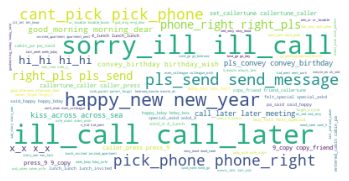

In [ ]:
img = WordCloud(background_color='white', collocation_threshold=3, collocations=True)\
    .generate(' '.join(ham_bigrams.apply('_'.join)))\
    #.generate(' ' .join(pd.Series(list(ham_words))))

plt.imshow(img)
plt.axis('off')

In [8]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}


In [23]:
tester = {' '.join(k): v for k, v in ham_bigrams.to_dict().items()}

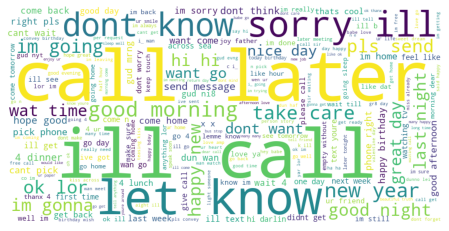

In [7]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

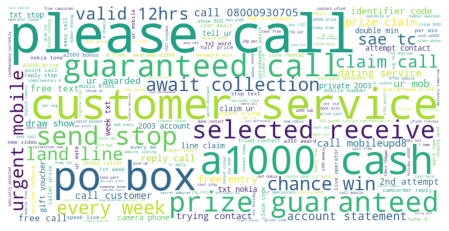

In [34]:
data = {' '.join(k): v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

Is there any overlap in the bigrams for the spam data and the ham data?


Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


<AxesSubplot:>

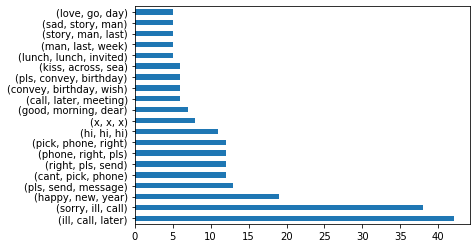

In [39]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words, 3)))
ham_trigrams.value_counts().head(20).plot.barh()

<AxesSubplot:>

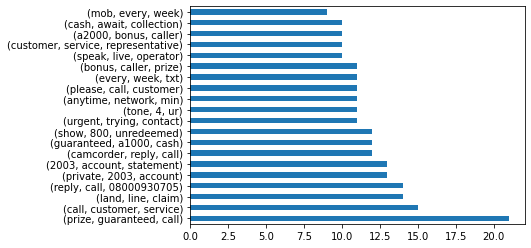

In [38]:
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words, 3)))
spam_trigrams.value_counts().head(20).plot.barh()

In [48]:
ham_bigrams.to_dict()

{('call', 'later'): 52,
 ('ill', 'call'): 48,
 ('let', 'know'): 42,
 ('sorry', 'ill'): 39,
 ('dont', 'know'): 32,
 ('good', 'morning'): 31,
 ('new', 'year'): 30,
 ('take', 'care'): 26,
 ('im', 'going'): 24,
 ('ok', 'lor'): 22,
 ('pls', 'send'): 22,
 ('im', 'gonna'): 20,
 ('good', 'night'): 19,
 ('happy', 'new'): 19,
 ('wat', 'time'): 18,
 ('last', 'night'): 18,
 ('hi', 'hi'): 18,
 ('great', 'day'): 17,
 ('dont', 'want'): 15,
 ('want', 'go'): 15,
 ('nice', 'day'): 15,
 ('send', 'message'): 15,
 ('dont', 'think'): 14,
 ('hope', 'good'): 14,
 ('4', 'dinner'): 14,
 ('pick', 'phone'): 13,
 ('want', 'come'): 13,
 ('im', 'home'): 13,
 ('cant', 'pick'): 13,
 ('good', 'afternoon'): 13,
 ('come', 'back'): 12,
 ('wait', '4'): 12,
 ('dun', 'wan'): 12,
 ('happy', 'birthday'): 12,
 ('come', 'home'): 12,
 ('phone', 'right'): 12,
 ('right', 'pls'): 12,
 ('gud', 'mrng'): 12,
 ('im', 'sorry'): 12,
 ('cant', 'wait'): 12,
 ('x', 'x'): 11,
 ('thats', 'cool'): 11,
 ('get', 'back'): 11,
 ('4', 'lunch'): 11,


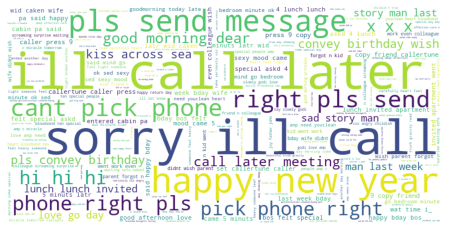

In [49]:
data = {' '.join(k): v for k, v in ham_trigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

# Explore the blog articles using the techniques discussed in the exploration lesson.



In [98]:
from importlib import reload
reload(acquire)

<module 'acquire' from '/Users/sinao/codeup-data-science/natural-language-processing-exercises/acquire.py'>

In [58]:
#wrangle
codeup_df = acquire.get_blog_content()
codeup_df = prepare.prep_text(codeup_df)

In [66]:
codeup_words = ' '.join(codeup_df.lemmatized)

(-0.5, 399.5, 199.5, -0.5)

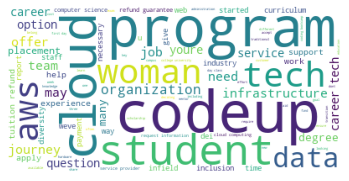

In [70]:
img = WordCloud(background_color='white')\
    .generate(codeup_words)

plt.imshow(img)
plt.axis('off')

In [92]:
codeup_bigrams = pd.Series(list(nltk.bigrams(codeup_words.split())))
codeup_trigrams = pd.Series(list(nltk.ngrams(codeup_words.split(), 3)))

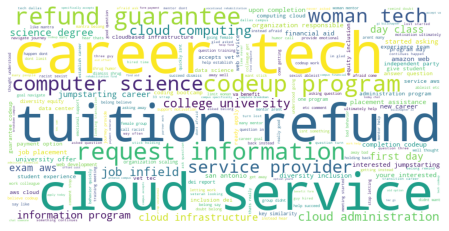

In [91]:
data = {' '.join(k): v for k, v in codeup_bigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

<AxesSubplot:>

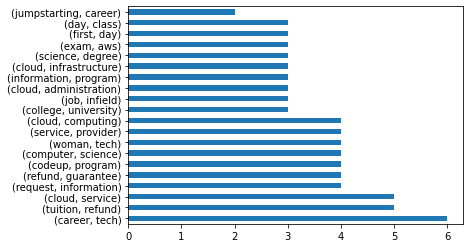

In [94]:
codeup_bigrams.value_counts().head(20).plot.barh()

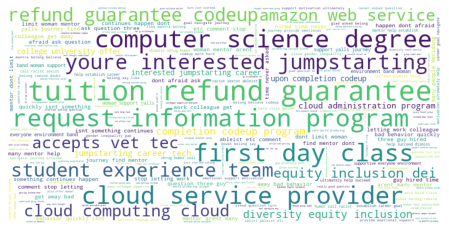

In [93]:
data = {' '.join(k): v for k, v in codeup_trigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

<AxesSubplot:>

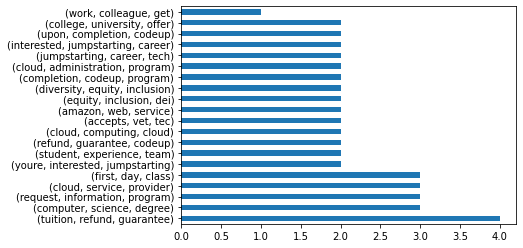

In [95]:
codeup_trigrams.value_counts().head(20).plot.barh()

In [82]:
#trying to see if i can get bigrams for each article seperately
codeup_df['bigrams']= codeup_df.lemmatized.apply(nltk.bigrams)

# Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

/Users/sinao/codeup-data-science/natural-language-processing-exercises/acquire.py:81: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 81 of the file /Users/sinao/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = soupify(get(url).content)


Removed 23 stopwords
---
Removed 27 stopwords
---
Removed 14 stopwords
---
Removed 21 stopwords
---
Removed 27 stopwords
---
Removed 23 stopwords
---
Removed 18 stopwords
---
Removed 22 stopwords
---
Removed 21 stopwords
---
Removed 22 stopwords
---
Removed 17 stopwords
---
Removed 24 stopwords
---
Removed 20 stopwords
---
Removed 20 stopwords
---
Removed 23 stopwords
---
Removed 20 stopwords
---
Removed 21 stopwords
---
Removed 23 stopwords
---
Removed 23 stopwords
---
Removed 20 stopwords
---
Removed 24 stopwords
---
Removed 23 stopwords
---
Removed 24 stopwords
---
Removed 22 stopwords
---
Removed 21 stopwords
---
Removed 23 stopwords
---
Removed 20 stopwords
---
Removed 17 stopwords
---
Removed 22 stopwords
---
Removed 17 stopwords
---
Removed 24 stopwords
---
Removed 34 stopwords
---
Removed 26 stopwords
---
Removed 23 stopwords
---
Removed 19 stopwords
---
Removed 20 stopwords
---
Removed 28 stopwords
---
Removed 30 stopwords
---
Removed 26 stopwords
---
Removed 24 stopwords
---


(-0.5, 399.5, 199.5, -0.5)

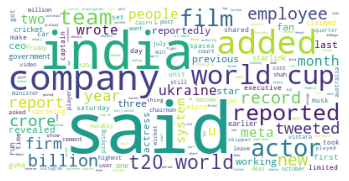

In [100]:
#wrangle
news_df = acquire.get_news_articles(fresh=True)
news_df = prepare.prep_text(news_df)
news_words = ' '.join(news_df.lemmatized)
img = WordCloud(background_color='white')\
    .generate(news_words)

plt.imshow(img)
plt.axis('off')

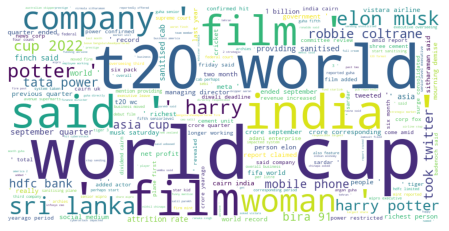

<AxesSubplot:>

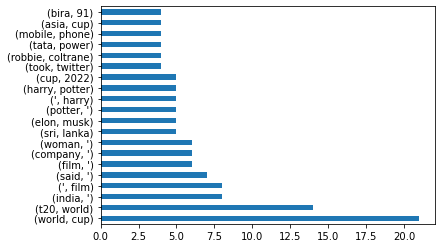

In [101]:
news_bigrams = pd.Series(list(nltk.bigrams(news_words.split())))

data = {' '.join(k): v for k, v in news_bigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

news_bigrams.value_counts().head(20).plot.barh()

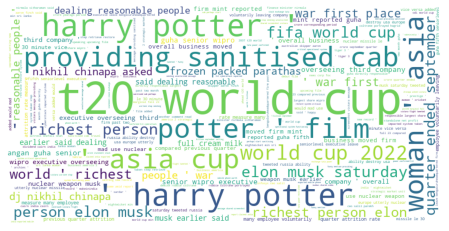

<AxesSubplot:>

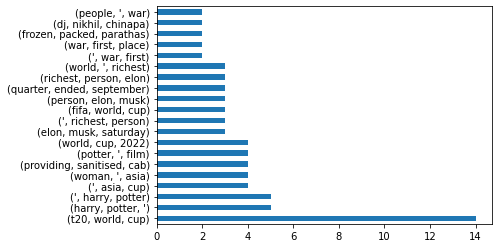

In [104]:
news_trigrams = pd.Series(list(nltk.ngrams(news_words.split(), 3)))
data = {' '.join(k): v for k, v in news_trigrams
                                    .value_counts()
                                    .to_dict()
                                    .items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()
news_trigrams.value_counts().head(20).plot.barh()